<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/mc_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)


# **Análisis Exploratorio de los Datos - Matriz de Correlación**

# **Carga de módulos**

### **Para analisis de datos**

In [1]:
import pandas as pd
import numpy as np

### **Para graficos**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

## **Carga de Datos**

***Antes que nada, se genera el dataframe con los datos que se utilizaran para la matriz de correlación...***


In [6]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/recursos_humanos_II.csv"

In [7]:
analisis = pd.read_csv(url)
analisis.drop(columns="Unnamed: 0", inplace=True)
analisis.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


***Se cambian los nombres de las columnas para mejor interpretacion...***

In [8]:
analisis.rename(columns={"satisfaction_level":"niveldesatisfaccion",
                         "last_evaluation":"ultimaevaluacion",
                         "number_project":"numerosdeproyectos",
                         "average_montly_hours":"horasmensualespromedio",
                         "time_spend_company":"tiempoenlaempresa",
                         "Work_accident":"accidentedetrabajo",
                         "left":"abandono",
                         "promotion_last_5years":"promocionultimos5años",
                         "sales":"ventas",
                         "salary":"sueldo"}, inplace= True)

# **Matriz de correlación**

***La correlación estadística constituye una técnica estadística que  indica si las variables están relacionadas o no lo están.***

***Por ejemplo, en las variables del ingreso familiar y el gasto familiar se sabe que un aumento en los ingresos genera un aumento en los gastos, y una disminución de los ingresos, genera una disminución de los gastos. Por lo tanto, las variables ingresos y gastos están relacionadas y un cambio en cualquiera de esas variables estará acompañado por un cambio en la otra variable en el mismo sentido, o con el mismo signo.***

***De la misma manera, los precios y la demanda de un producto son variables relacionadas; cuando los precios aumentan la demanda tenderá a disminuir y viceversa.***


***En el caso del ingreso familiar y el gasto familiar, es fácil ver que ambos suben o bajan juntos en la misma dirección. Esto se denomina correlación positiva.***

***En caso del precio y la demanda, el cambio se produce en la dirección opuesta, de modo que el aumento de una variables está acompañado de una disminución en la otra variable. Esto se conoce como correlación negativa.***

## **Matriz de correlación** - Coeficiente estándar = método Pearson

***La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas, Spearman y Kendall.***

***La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.***



***La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos.***


In [9]:
pearson = analisis.corr(method="pearson")

In [10]:
pearson

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
ultimaevaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numerosdeproyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
horasmensualespromedio,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiempoenlaempresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentedetrabajo,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocionultimos5años,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


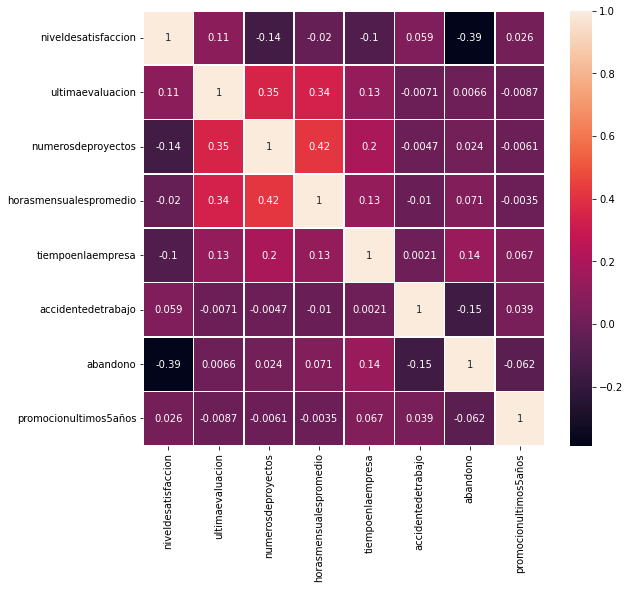

In [11]:
plt.figure(figsize=(9,8))
sns.heatmap(pearson, 
            annot=True,
            linewidths=.5)

plt.show()

***Un valor positivo grande (cercano a 1) indica una fuerte correlación positiva, es decir, si el valor de una de las variables aumenta, el valor de la otra variable aumenta también.***

***Un valor negativo grande (cercano a -1) indica una fuerte correlación negativa, es decir, que el valor de una de las variables disminuye al aumentar el de la otra y viceversa.***

***Un valor cercano a 0 (tanto positivo como negativo) indica la ausencia de cualquier correlación entre las dos variables, y por lo tanto esas variables son independientes entre sí.***

## **Ordenando los valores de la Matriz de correlación**

In [12]:
orden = pearson.unstack()

In [13]:
print(orden)

niveldesatisfaccion    niveldesatisfaccion       1.000000
                       ultimaevaluacion          0.105021
                       numerosdeproyectos       -0.142970
                       horasmensualespromedio   -0.020048
                       tiempoenlaempresa        -0.100866
                                                   ...   
promocionultimos5años  horasmensualespromedio   -0.003544
                       tiempoenlaempresa         0.067433
                       accidentedetrabajo        0.039245
                       abandono                 -0.061788
                       promocionultimos5años     1.000000
Length: 64, dtype: float64


In [14]:
orden = orden.sort_values()

In [15]:
print(orden)

abandono                niveldesatisfaccion      -0.388375
niveldesatisfaccion     abandono                 -0.388375
abandono                accidentedetrabajo       -0.154622
accidentedetrabajo      abandono                 -0.154622
niveldesatisfaccion     numerosdeproyectos       -0.142970
                                                    ...   
horasmensualespromedio  horasmensualespromedio    1.000000
numerosdeproyectos      numerosdeproyectos        1.000000
ultimaevaluacion        ultimaevaluacion          1.000000
abandono                abandono                  1.000000
promocionultimos5años   promocionultimos5años     1.000000
Length: 64, dtype: float64


### Viendo **los valores negativos**

In [16]:
negativos = orden[orden < 0]

In [17]:
print(negativos)

abandono                niveldesatisfaccion      -0.388375
niveldesatisfaccion     abandono                 -0.388375
abandono                accidentedetrabajo       -0.154622
accidentedetrabajo      abandono                 -0.154622
niveldesatisfaccion     numerosdeproyectos       -0.142970
numerosdeproyectos      niveldesatisfaccion      -0.142970
niveldesatisfaccion     tiempoenlaempresa        -0.100866
tiempoenlaempresa       niveldesatisfaccion      -0.100866
abandono                promocionultimos5años    -0.061788
promocionultimos5años   abandono                 -0.061788
horasmensualespromedio  niveldesatisfaccion      -0.020048
niveldesatisfaccion     horasmensualespromedio   -0.020048
horasmensualespromedio  accidentedetrabajo       -0.010143
accidentedetrabajo      horasmensualespromedio   -0.010143
ultimaevaluacion        promocionultimos5años    -0.008684
promocionultimos5años   ultimaevaluacion         -0.008684
accidentedetrabajo      ultimaevaluacion         -0.0071

### Viendo **los valores positivos**

***Elegir variables fuertemente relacionadas. Es decir, se filtran las variables cuyos valores de coeficiente de correlación sean mayores de 0,4...***

In [18]:
positivos = orden[orden > 0.4]

In [19]:
print(positivos)

horasmensualespromedio  numerosdeproyectos        0.417211
numerosdeproyectos      horasmensualespromedio    0.417211
niveldesatisfaccion     niveldesatisfaccion       1.000000
accidentedetrabajo      accidentedetrabajo        1.000000
tiempoenlaempresa       tiempoenlaempresa         1.000000
horasmensualespromedio  horasmensualespromedio    1.000000
numerosdeproyectos      numerosdeproyectos        1.000000
ultimaevaluacion        ultimaevaluacion          1.000000
abandono                abandono                  1.000000
promocionultimos5años   promocionultimos5años     1.000000
dtype: float64


## **Estilo en el DataFrame** - Matriz en Pandas

In [20]:
pearson

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
ultimaevaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numerosdeproyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
horasmensualespromedio,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiempoenlaempresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentedetrabajo,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocionultimos5años,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [21]:
pearson.style.background_gradient(cmap="coolwarm")

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
ultimaevaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numerosdeproyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
horasmensualespromedio,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiempoenlaempresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentedetrabajo,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocionultimos5años,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [22]:
pearson.style.background_gradient(cmap="plasma")

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
ultimaevaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numerosdeproyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
horasmensualespromedio,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiempoenlaempresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentedetrabajo,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocionultimos5años,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [23]:
pearson.style.background_gradient(cmap="viridis")

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
ultimaevaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numerosdeproyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
horasmensualespromedio,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiempoenlaempresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentedetrabajo,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocionultimos5años,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [24]:
pearson.style.background_gradient(cmap="copper")

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
ultimaevaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numerosdeproyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
horasmensualespromedio,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiempoenlaempresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentedetrabajo,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocionultimos5años,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## **Matriz de correlación** - Coeficiente estándar = método Spearman

In [25]:
spearman = analisis.corr(method="spearman")

In [26]:
spearman

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
ultimaevaluacion,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
numerosdeproyectos,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
horasmensualespromedio,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
tiempoenlaempresa,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
accidentedetrabajo,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
abandono,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promocionultimos5años,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


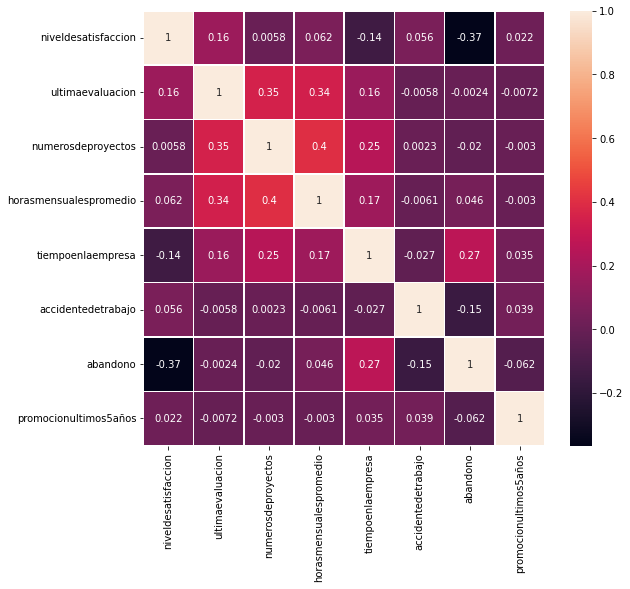

In [27]:
plt.figure(figsize=(9,8))
sns.heatmap(spearman, 
            annot=True,
            linewidths=.5)

plt.show()

## **Matriz de correlación** - Coeficiente estándar = método Kendall

In [28]:
kendall = analisis.corr(method="kendall")

In [29]:
kendall

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
ultimaevaluacion,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
numerosdeproyectos,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
horasmensualespromedio,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
tiempoenlaempresa,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
accidentedetrabajo,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
abandono,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promocionultimos5años,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


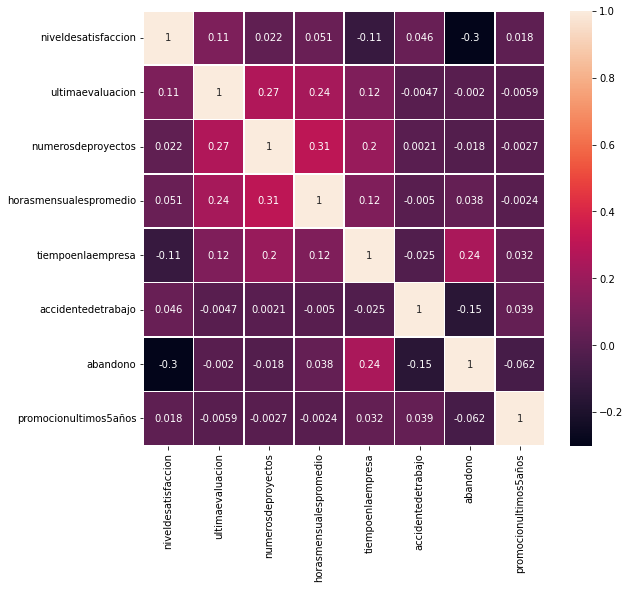

In [30]:
plt.figure(figsize=(9,8))
sns.heatmap(kendall, 
            annot=True,
            linewidths=.5)

plt.show()